In [1]:
# Import library yang dibutuhkan
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

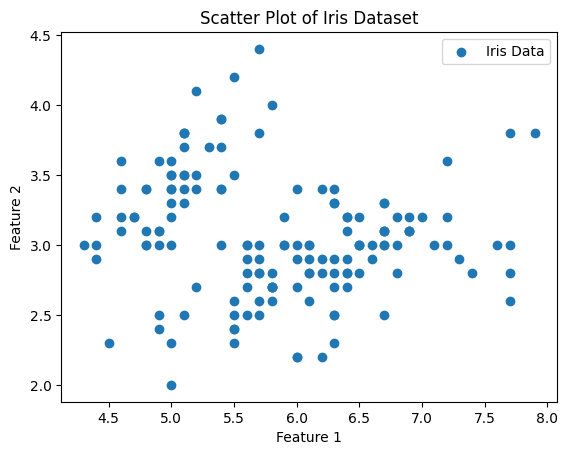

In [2]:
# Load dataset Iris
iris = datasets.load_iris()

# Ambil fitur dari dataset
features = iris.data

# Visualisasi dua fitur pertama
plt.scatter(features[:, 0], features[:, 1], label='Iris Data')
plt.title('Scatter Plot of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [3]:
# Standardisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

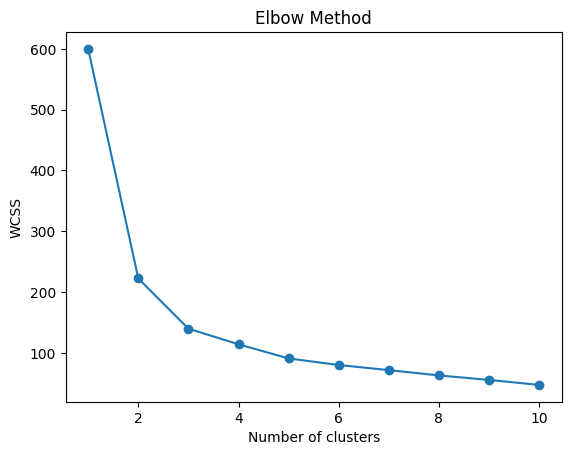

In [4]:
# Inisialisasi list untuk menyimpan WCSS (Within-Cluster Sum of Squares)
wcss = []

# Hitung WCSS untuk jumlah cluster dari 1 sampai 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_standardized)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

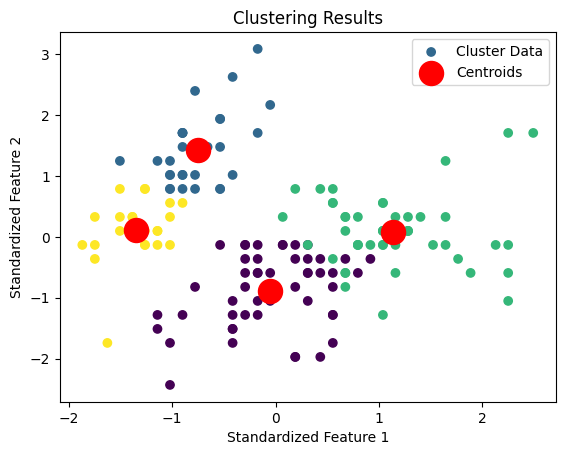

In [5]:
# Melakukan clustering dengan jumlah cluster yang diinginkan (contoh: 4 clusters)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features_standardized)

# Plot hasil clustering
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=pred_y, cmap='viridis', label='Cluster Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clustering Results')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.show()